### Link to GitHub repo: https://github.com/prajwalseth/ML-2
-------------

# Objective: Predict World Happiness Rankings 

What makes the citizens of one country more happy than the citizens of other countries?  Do variables measuring perceptions of corruption, GDP, maintaining a healthy lifestyle, or social support associate with a country's happiness ranking?  

Let's use the United Nation's World Happiness Rankings country level data to experiment with models that predict happiness rankings well.


---

**Data**: 2019 World Happiness Survey Rankings
*(Data can be found on Advanced Projects in ML courseworks site)*

**Features**
*   Country or region
*   GDP per capita
*   Social support
*   Healthy life expectancy
*   Freedom to make life choices
*   Generosity
*   Perceptions of corruption

**Target**
*   Happiness_level (Very High = Top 20% and Very Low = Bottom 20%)

Source: https://worldhappiness.report/




# Mini-Hackathon In Class Tasks



1.   Build, save, and submit at least one Keras model.
2.   Build, save, and submit at least one Scikit-learn model.
3.   Seek advice through collaboration via Github (Live class only--Not an asynchronous activity:

*      Save notebook w/ best model to private repo
*      Invite a collaborator
*      Collaborator should submit at least two issues w/ suggestions for model improvement

4.   Brainstorm together (Add issues to class hackathon github repo)
5.   If time, improve model further!











# Import the data




In [73]:
# Colab Setup: 
# note that tabular preprocessors require scikit-learn>=0.24.0
# Newest Tensorflow 2 has some bugs for onnx conversion
!pip install scikit-learn --upgrade 
import os
os.environ['TF_KERAS'] = '1'
% tensorflow_version 1

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.24.1)
`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1`. This will be interpreted as: `1.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.


In [74]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data=pd.read_csv("worldhappiness2019.csv")

data.head()

,Happiness_level,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,name,region,sub-region
0,Very High,Finland,1.340,1.587,0.986,0.596,0.153,0.393,Finland,Europe,Northern Europe
1,Very High,Denmark,1.383,1.573,0.996,0.592,0.252,0.410,Denmark,Europe,Northern Europe
2,Very High,Norway,1.488,1.582,1.028,0.603,0.271,0.341,Norway,Europe,Northern Europe
3,Very High,Iceland,1.380,1.624,1.026,0.591,0.354,0.118,Iceland,Europe,Northern Europe
4,Very High,Netherlands,1.396,1.522,0.999,0.557,0.322,0.298,Netherlands,Europe,Western Europe


In [75]:
# Clean up final region data
X = data.drop(['Happiness_level', 'name', 'Country or region', 'sub-region'], axis=1)
y = data['Happiness_level']

X.shape, y.shape

((156, 7), (156,))

# Build a model to predict happiness rankings

In [76]:
# Set up training and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_train.columns.tolist())

(104, 7)
(104,)
['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'region']


## Preprocess data using Column Transformer and save fit preprocessor to ".pkl" file

In [77]:
import sklearn

In [78]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# We create the preprocessing pipelines for both numeric and categorical data.

numeric_features=X.columns.tolist()
numeric_features.remove('region')

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['region']

#Replacing missing values with Modal value and then one hot encoding.
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# final preprocessor object set up with ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])


#Fit your preprocessor object
preprocess=preprocessor.fit(X_train) 



In [79]:
# Write function to transform data with preprocessor

def preprocessor(data):
    preprocessed_data=preprocess.transform(data)
    return preprocessed_data

In [80]:
# Check shape for keras input:
preprocessor(X_train).shape # pretty small dataset

(104, 11)

In [81]:
# Check shape for keras output:
pd.get_dummies(y_train).shape

(104, 5)

## **Exploring bivariate results**

In [82]:
import seaborn as sns
sns.set_theme(style="ticks")

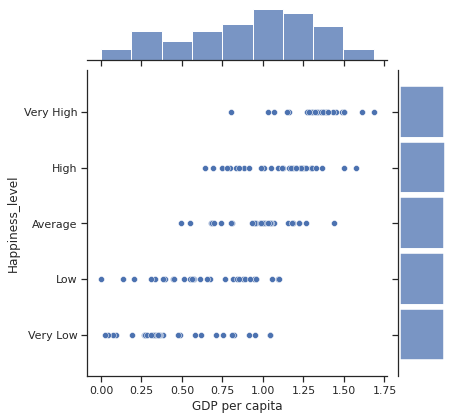

In [83]:
sns.jointplot(x="GDP per capita", y=y, data=data)

Happiness level seems to increase with an increase in GDP per capita

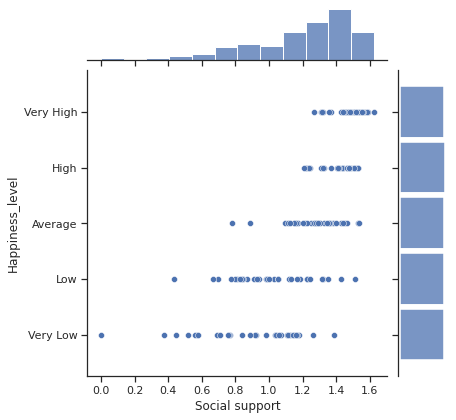

In [84]:
sns.jointplot(x="Social support", y=y, data=data);

Happiness level seems to increase with an increase in social support

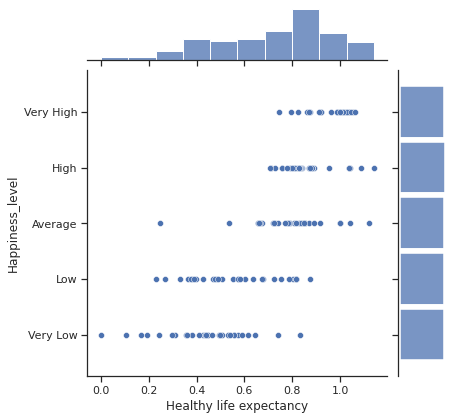

In [85]:
sns.jointplot(x="Healthy life expectancy", y=y, data=data);

Happiness level seems to increase with an increase in healthy life expectancy

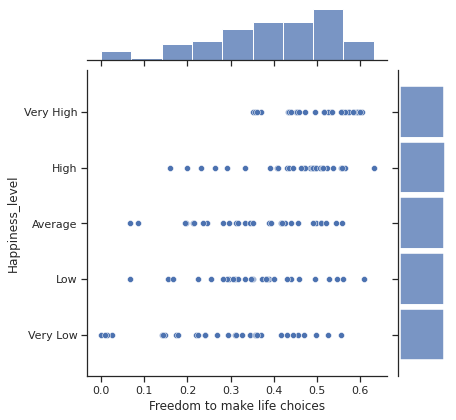

In [86]:
sns.jointplot(x="Freedom to make life choices", y=y, data=data);

Happiness level seems to not have much correlation with freedom to make life choices

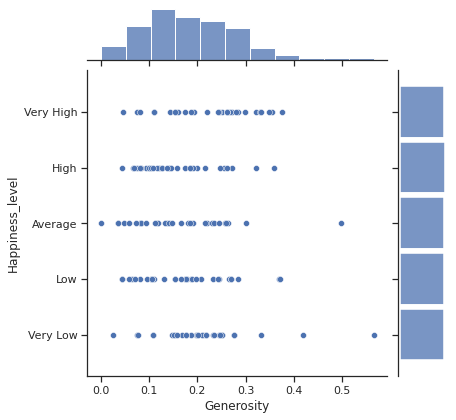

In [87]:
sns.jointplot(x="Generosity", y=y, data=data);

Happiness level seems to not have much correlation with generosity

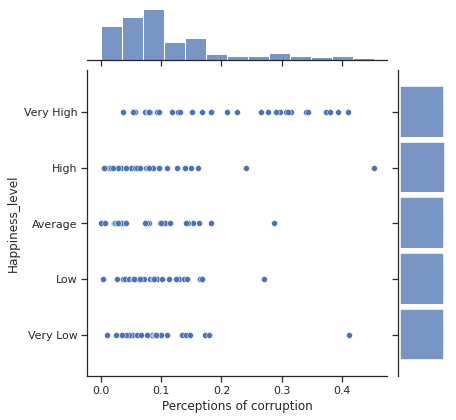

In [88]:
sns.jointplot(x="Perceptions of corruption", y=y, data=data);

Countries with low happiness levels also seem to have a low perception of corruption

## **Examine features that predict happiness categories using one or more models that allow for automatic feature selection**

In [89]:

from sklearn.decomposition import PCA
pca = PCA(n_components=5)
fit = pca.fit(preprocessor(X))
# summarize components
print("Explained Variance: %s" % fit.explained_variance_ratio_)
print(fit.components_)

X_train_pca = pca.fit_transform(preprocessor(X_train))
X_test_pca = pca.transform(preprocessor(X_test))


Explained Variance: [0.47349373 0.20424256 0.08876807 0.08286044 0.05121039]
[[-0.49952922 -0.4865312  -0.54182436 -0.3310608  -0.03668855 -0.23735392
   0.19049672 -0.0312937  -0.02531957 -0.12184331 -0.01204014]
 [-0.17259856 -0.17156824 -0.15568848  0.39199724  0.70173414  0.50453727
   0.05823355 -0.04747411  0.05263025 -0.08394751  0.02055782]
 [ 0.04842926  0.12767467  0.14511892 -0.29981855  0.66693264 -0.58277211
  -0.21139973 -0.00955061  0.20118574  0.02613883 -0.00637422]
 [ 0.19763653 -0.26175115  0.22388944 -0.72041585  0.07515599  0.51091522
  -0.03896832 -0.17284322  0.04589945  0.15134609  0.014566  ]
 [ 0.10770561 -0.52509663  0.26120335  0.20621595 -0.17803926 -0.07089937
  -0.23397729  0.00275801  0.61260057 -0.36737942 -0.01400187]]


In [90]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=9, random_state=0)
classifier.fit(X_train_pca, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test_pca)


In [91]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + classification_report(y_test, y_pred))


[[4 4 2 1 1]
 [0 8 0 0 0]
 [0 1 5 0 4]
 [0 8 0 3 0]
 [1 0 4 0 6]]
Accuracy              precision    recall  f1-score   support

     Average       0.80      0.33      0.47        12
        High       0.38      1.00      0.55         8
         Low       0.45      0.50      0.48        10
   Very High       0.75      0.27      0.40        11
    Very Low       0.55      0.55      0.55        11

    accuracy                           0.50        52
   macro avg       0.59      0.53      0.49        52
weighted avg       0.60      0.50      0.49        52



We get an f1-score of about 0.5 and an avergage accuracy of 0.6 when using PCA with 5 components. This is almost equal to the highest f-1 score in the leaderboard at the time of writing (0.53).

## Fit a neural network with Keras

In [92]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
import keras
from keras.optimizers import SGD
model = Sequential()
model.add(Dense(256, input_dim=11, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))

model.add(Dense(5, activation='softmax')) 
                                            
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Fitting the NN to the Training set
model.fit(preprocessor(X_train), pd.get_dummies(y_train), 
               batch_size = 60, 
               epochs = 600, validation_split=0.35)  



Train on 67 samples, validate on 37 samples
Epoch 1/600
67/67 [==============================] - 0s 2ms/step - loss: 1.6333 - accuracy: 0.0746 - val_loss: 1.6203 - val_accuracy: 0.1351
Epoch 2/600
67/67 [==============================] - 0s 237us/step - loss: 1.6246 - accuracy: 0.0746 - val_loss: 1.6145 - val_accuracy: 0.1622
Epoch 3/600
67/67 [==============================] - 0s 307us/step - loss: 1.6166 - accuracy: 0.1045 - val_loss: 1.6060 - val_accuracy: 0.1892
Epoch 4/600
67/67 [==============================] - 0s 232us/step - loss: 1.6061 - accuracy: 0.1343 - val_loss: 1.5978 - val_accuracy: 0.2162
Epoch 5/600
67/67 [==============================] - 0s 240us/step - loss: 1.5960 - accuracy: 0.2985 - val_loss: 1.5945 - val_accuracy: 0.2973
Epoch 6/600
67/67 [==============================] - 0s 213us/step - loss: 1.5887 - accuracy: 0.3582 - val_loss: 1.5886 - val_accuracy: 0.3243
Epoch 7/600
67/67 [==============================] - 0s 314us/step - loss: 1.5802 - accuracy: 0.3731

*italicized text*## An important aside for production ready Keras models: 
*Keras classification model objects return the predicted probabilities of each class for every prediction.  How do we return a target label instead?*

In [93]:
# using predict_classes() for multi-class data to return predicted class index.

print(model.predict_classes(preprocessor(X_test)))

#prediction_index=model.predict_classes(preprocess.transform(X_test))
prediction_index=model.predict_classes(preprocessor(X_test))

#Now lets run some code to get keras to return the label rather than the index...

# get labels from one hot encoded y_train data
labels=pd.get_dummies(y_train).columns

# Iterate through all predicted indices using map method

predicted_labels=list(map(lambda x: labels[x], prediction_index))
print(predicted_labels)

[1 0 0 1 4 1 0 0 1 2 1 0 3 2 3 1 4 4 4 1 2 3 3 3 1 2 0 1 1 2 0 2 1 4 2 4 2
 2 1 1 2 1 4 3 3 1 4 1 1 1 1 2]
['High', 'Average', 'Average', 'High', 'Very Low', 'High', 'Average', 'Average', 'High', 'Low', 'High', 'Average', 'Very High', 'Low', 'Very High', 'High', 'Very Low', 'Very Low', 'Very Low', 'High', 'Low', 'Very High', 'Very High', 'Very High', 'High', 'Low', 'Average', 'High', 'High', 'Low', 'Average', 'Low', 'High', 'Very Low', 'Low', 'Very Low', 'Low', 'Low', 'High', 'High', 'Low', 'High', 'Very Low', 'Very High', 'Very High', 'High', 'Very Low', 'High', 'High', 'High', 'High', 'Low']


## Save preprocessor to preprocessor.zip, save model to onnx, and submit model to leaderboard:
Will use the above predictions to submit to our leaderboard in a bit.

## Save preprocessor fxn to "preprocessor.zip"

In [94]:
#install aimodelshare library
! pip install aimodelshare --upgrade --extra-index-url https://test.pypi.org/simple/ 

Looking in indexes: https://pypi.org/simple, https://test.pypi.org/simple/
Requirement already up-to-date: aimodelshare in /usr/local/lib/python3.6/dist-packages (0.0.22)


In [95]:
#Save preprocessor function to local "preprocessor.zip" file for leaderboard submission
import aimodelshare as ai
ai.export_preprocessor(preprocessor,"")

In [96]:
#test your preprocessor
prep=ai.import_preprocessor("preprocessor.zip")
prep(X_test)

array([[ 0.43324268,  0.98746467,  0.30608999, -0.49419308, -1.02922311,
        -1.12857011,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ],
       [ 0.22576861,  0.56985629,  0.46914502, -0.68085385, -0.47864027,
        -0.79447811,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ],
       [ 0.09373965,  1.04528737, -0.31268295, -0.4555736 ,  0.4848797 ,
        -0.8040236 ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ],
       [ 0.25170286,  0.62767899,  0.15557766,  0.70301054, -0.71460434,
        -0.202658  ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [-1.36093651, -0.48058941, -1.51260074, -0.85464148, -0.08536681,
        -0.08811218,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.8906287 ,  0.89430588,  1.33877186, -0.16592757, -0.32133089,
        -0.41265869,  0.        ,  0.        ,  0.        ,  1.        ,
         0.   

## Save keras model to onnx file.  

In [97]:
from aimodelshare.aimsonnx import model_to_onnx
# transform sklearn model to ONNX
onnx_model_keras= model_to_onnx(model, framework='keras', 
                                   transfer_learning=True,
                                   deep_learning=True,
                                   task_type='classification')

# Save model to local .onnx file
with open("onnx_model_keras.onnx", "wb") as f:
    f.write(onnx_model_keras.SerializeToString())

The ONNX operator number change on the optimization: 32 -> 12


## Aside: Example of code similar to what is run behind the scenes within our REST api:

In [98]:
# In onnx you can make predictions in the following manner.  This is what happens behinds the scenes in our live web-application.
# the json input data is sent to a REST Api, transformed to a pandas dataframe, preprocessed, then predictions are generated from our onnx model.

import onnxruntime as rt
sess= rt.InferenceSession("onnx_model_keras.onnx")
input_name = sess.get_inputs()[0].name
bodydict={ 'GDP per capita': [1], 'Social support': [1], 'Healthy life expectancy': [1], 'Freedom to make life choices': [1], 'Generosity': [1], 'Perceptions of corruption': [1],'region': ['Europe']}


bodynew = pd.DataFrame.from_dict(bodydict)

input_data=preprocessor(bodynew).astype("float32")
input_data

array([[ 0.21633796, -0.6604822 ,  1.0795562 ,  3.9406095 ,  8.006234  ,
         8.378734  ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ]], dtype=float32)

In [99]:
# Here is the resulting predicted probability for each of the five cats of our target variable
res = sess.run(None,  {input_name: input_data})
res[0]

array([[5.9090016e-05, 4.5212102e-01, 2.1084330e-07, 5.4781932e-01,
        4.2113018e-07]], dtype=float32)

# Submit model to World Happiness Leaderboard

### To submit a model you need to sign up for username and password at:
[AI Model Share Initiative Site](http://mlsite5aimodelshare-dev.s3-website.us-east-2.amazonaws.com/login)

# Set up necessary arguments for model submission using aimodelshare python library.

## Required information for tabular models:
* api_url ( the api url for whatever aimodelshare project you are submitting a model to)
* aws key  and password (provided for you)
* model file path
* preprocessor file path



In [100]:
import pickle
#aimodelshare username and password
username = "prajseth"
password = "Columbia@21"

# load submit model creds (only gives access to s3 bucket)
# Load from pkl file
with open("aws_creds_worldhappiness.pkl", 'rb') as file:
    aws_key,aws_password,region = pickle.load(file)

token=ai.aws.get_aws_token(username, password)
awscreds=ai.aws.get_aws_client(aws_key=aws_key, aws_secret=aws_password, aws_region=region)

In [101]:
# Submit_model() to leaderboard
ai.submit_model("onnx_model_keras.onnx",
                "https://z69mxrxdz5.execute-api.us-east-1.amazonaws.com/prod/m",
                token,awscreds,prediction_submission=predicted_labels,
                preprocessor="preprocessor.zip")

True

# Now you can check the leaderboard!

In [102]:
import pandas
data=ai.get_leaderboard("https://z69mxrxdz5.execute-api.us-east-1.amazonaws.com/prod/m",
                token,awscreds,verbose=2)

#get rid of any duplicate model submissions
#data=data.loc[data.iloc[:,0:8].duplicated()==False,:]
data

,accuracy,f1_score,precision,recall,ml_framework,transfer_learning,deep_learning,model_type,depth,num_params,dense_layers,loss,optimizer,model_config,username,timestamp,version
0,0.538462,0.532364,0.593922,0.550303,sklearn,NaN,NaN,SVC,NaN,110.0,NaN,NaN,NaN,"{'C': 10, 'break_ties': False, 'cache_size': 2...",prajseth,2021-02-08 16:20:05.545277,125
1,0.538462,0.532364,0.593922,0.550303,sklearn,NaN,NaN,SVC,NaN,110.0,NaN,NaN,NaN,"{'C': 10, 'break_ties': False, 'cache_size': 2...",prajseth,2021-02-08 15:14:12.169592,110
2,0.538462,0.532364,0.593922,0.550303,sklearn,NaN,NaN,SVC,NaN,110.0,NaN,NaN,NaN,"{'C': 10, 'break_ties': False, 'cache_size': 2...",prajseth,2021-02-07 23:28:17.634985,96
3,0.538462,0.532364,0.593922,0.550303,sklearn,NaN,NaN,SVC,NaN,110.0,NaN,NaN,NaN,"{'C': 10, 'break_ties': False, 'cache_size': 2...",prajseth,2021-02-07 23:06:01.625302,94
4,0.538462,0.532364,0.593922,0.550303,sklearn,NaN,NaN,SVC,NaN,110.0,NaN,NaN,NaN,"{'C': 10, 'break_ties': False, 'cache_size': 2...",prajseth,2021-02-02 00:57:22.077630,67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,NaN,NaN,NaN,NaN,sklearn,NaN,NaN,RandomForestClassifier,NaN,NaN,NaN,NaN,NaN,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",kka2120,2021-02-02 20:06:48.368529,75
111,NaN,NaN,NaN,NaN,sklearn,NaN,NaN,LinearSVC,NaN,75.0,NaN,NaN,NaN,"{'C': 87.58758758758759, 'class_weight': None,...",mro9395,2021-02-08 05:04:26.726150,102
112,NaN,NaN,NaN,NaN,sklearn,NaN,NaN,LinearSVC,NaN,20.0,NaN,NaN,NaN,"{'C': 87.58758758758759, 'class_weight': None,...",mro9395,2021-02-08 05:00:55.566116,101
113,NaN,NaN,NaN,NaN,sklearn,NaN,NaN,RandomForestClassifier,NaN,NaN,NaN,NaN,NaN,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",mro9395,2021-02-08 16:02:15.936710,119


In [103]:
ai.stylize_leaderboard(data, category="classification")

,accuracy,f1_score,precision,recall,ml_framework,transfer_learning,deep_learning,model_type,depth,num_params,dense_layers,loss,optimizer,model_config,username,version
0,53.85%,53.24%,59.39%,55.03%,sklearn,nan,nan,SVC,nan,110.000000,nan,nan,nan,"{'C': 10, 'break_ties': False,...",prajseth,125
1,53.85%,53.24%,59.39%,55.03%,sklearn,nan,nan,SVC,nan,110.000000,nan,nan,nan,"{'C': 10, 'break_ties': False,...",prajseth,110
2,53.85%,53.24%,59.39%,55.03%,sklearn,nan,nan,SVC,nan,110.000000,nan,nan,nan,"{'C': 10, 'break_ties': False,...",prajseth,96
3,53.85%,53.24%,59.39%,55.03%,sklearn,nan,nan,SVC,nan,110.000000,nan,nan,nan,"{'C': 10, 'break_ties': False,...",prajseth,94
4,53.85%,53.24%,59.39%,55.03%,sklearn,nan,nan,SVC,nan,110.000000,nan,nan,nan,"{'C': 10, 'break_ties': False,...",prajseth,67
5,53.85%,53.24%,59.39%,55.03%,sklearn,nan,nan,SVC,nan,110.000000,nan,nan,nan,"{'C': 5, 'break_ties': False, ...",kka2120,90
6,51.92%,52.34%,56.79%,53.33%,keras,True,True,Sequential,4.000000,35205.000000,4.000000,str,SGD,"{'name': 'sequential_5', 'laye...",prajseth,15
7,51.92%,51.99%,55.57%,53.00%,keras,True,True,Sequential,4.000000,135941.000000,4.000000,str,SGD,"{'name': 'sequential_1', 'laye...",prajseth,124
8,50.00%,50.50%,55.44%,51.52%,keras,True,True,Sequential,5.000000,201733.000000,5.000000,str,SGD,"{'name': 'sequential_8', 'laye...",prajseth,30
9,50.00%,50.49%,55.78%,51.48%,keras,True,True,Sequential,4.000000,135941.000000,4.000000,str,SGD,"{'name': 'sequential_9', 'laye...",prajseth,34


## Build, save, and submit a sklearn model


In [104]:
# Build, save, and submit a sklearn model

from numpy import loadtxt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import svm

#Import Random Forest Model
#from sklearn.ensemble import RandomForestClassifier
#Create a Gaussian Classifier
#model=RandomForestClassifier(n_estimators=1500, random_state = 42)
model = svm.SVC(kernel='linear', gamma=0.001, C=10, decision_function_shape='ovo')
#Train the model using the training sets y_pred=clf.predict(X_test)
model.fit(preprocessor(X_train), y_train)


#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
#print("Accuracy on Test Data:",metrics.accuracy_score(y_test, y_pred))

print("SVC's cross validation accuracy:", np.mean(cross_val_score(model, preprocess.transform(X_train), y_train, cv=10)))
print("SVC's Test-Data prediction accuracy: {:.5f}".format(model.score(preprocessor(X_test), y_test)))


SVC's cross validation accuracy: 0.579090909090909
SVC's Test-Data prediction accuracy: 0.53846


In [105]:
predicted_labels=model.predict(preprocessor(X_test))

In [106]:
# Save sklearn model to onnx file
import aimodelshare as ai
from aimodelshare.aimsonnx import model_to_onnx

# How many preprocessed input features are there?
# Change numeric value in FloatTensorType to update
from skl2onnx.common.data_types import FloatTensorType
initial_type = [('float_input', FloatTensorType([None, 11]))]

# transform sklearn model to ONNX
onnx_model_sklearn = model_to_onnx(model, framework='sklearn', 
                                   initial_types=initial_type,                  # think about automating initial types
                                   transfer_learning=False,
                                   deep_learning=False,
                                   task_type='classification')

# Save model to local .onnx file
with open("onnx_model_sklearn.onnx", "wb") as f:
    f.write(onnx_model_sklearn.SerializeToString())

In [107]:
#aimodelshare username and password
username = "prajseth"
password = "Columbia@21"

# load submit model creds (only gives access to s3 bucket)
# Load from pkl file
with open("aws_creds_worldhappiness.pkl", 'rb') as file:
    aws_key,aws_password,region = pickle.load(file)

token=ai.aws.get_aws_token(username, password)
awscreds=ai.aws.get_aws_client(aws_key=aws_key, aws_secret=aws_password, aws_region=region)

In [108]:
# test submit_model()
ai.submit_model("onnx_model_sklearn.onnx",
                "https://z69mxrxdz5.execute-api.us-east-1.amazonaws.com/prod/m",
                token,awscreds,prediction_submission=predicted_labels,
                preprocessor="preprocessor.zip")

True

In [109]:
# Check leaderboard
import pandas
data=ai.get_leaderboard("https://z69mxrxdz5.execute-api.us-east-1.amazonaws.com/prod/m",
                token,awscreds,verbose=2)

#get rid of any duplicate model submissions
#data=data.loc[data.iloc[:,0:8].duplicated()==False,:]
data

,accuracy,f1_score,precision,recall,ml_framework,transfer_learning,deep_learning,model_type,depth,num_params,dense_layers,loss,optimizer,model_config,username,timestamp,version
0,0.538462,0.532364,0.593922,0.550303,sklearn,NaN,NaN,SVC,NaN,110.0,NaN,NaN,NaN,"{'C': 10, 'break_ties': False, 'cache_size': 2...",prajseth,2021-02-08 16:44:54.551653,131
1,0.538462,0.532364,0.593922,0.550303,sklearn,NaN,NaN,SVC,NaN,110.0,NaN,NaN,NaN,"{'C': 10, 'break_ties': False, 'cache_size': 2...",prajseth,2021-02-08 16:20:05.545277,125
2,0.538462,0.532364,0.593922,0.550303,sklearn,NaN,NaN,SVC,NaN,110.0,NaN,NaN,NaN,"{'C': 10, 'break_ties': False, 'cache_size': 2...",prajseth,2021-02-02 00:57:22.077630,67
3,0.538462,0.532364,0.593922,0.550303,sklearn,NaN,NaN,SVC,NaN,110.0,NaN,NaN,NaN,"{'C': 10, 'break_ties': False, 'cache_size': 2...",prajseth,2021-02-08 15:14:12.169592,110
4,0.538462,0.532364,0.593922,0.550303,sklearn,NaN,NaN,SVC,NaN,110.0,NaN,NaN,NaN,"{'C': 5, 'break_ties': False, 'cache_size': 20...",kka2120,2021-02-07 19:08:32.577228,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,NaN,NaN,NaN,NaN,sklearn,NaN,NaN,LinearSVC,NaN,75.0,NaN,NaN,NaN,"{'C': 87.58758758758759, 'class_weight': None,...",mro9395,2021-02-08 05:04:26.726150,102
112,NaN,NaN,NaN,NaN,sklearn,NaN,NaN,LinearSVC,NaN,20.0,NaN,NaN,NaN,"{'C': 87.58758758758759, 'class_weight': None,...",mro9395,2021-02-08 05:00:55.566116,101
113,NaN,NaN,NaN,NaN,sklearn,NaN,NaN,LinearSVC,NaN,20.0,NaN,NaN,NaN,"{'C': 87.58758758758759, 'class_weight': None,...",mro9395,2021-02-08 04:49:22.343934,100
114,NaN,NaN,NaN,NaN,sklearn,NaN,NaN,RandomForestClassifier,NaN,NaN,NaN,NaN,NaN,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",mro9395,2021-02-08 16:02:15.936710,119


In [110]:
ai.stylize_leaderboard(data, category="classification")

,accuracy,f1_score,precision,recall,ml_framework,transfer_learning,deep_learning,model_type,depth,num_params,dense_layers,loss,optimizer,model_config,username,version
0,53.85%,53.24%,59.39%,55.03%,sklearn,nan,nan,SVC,nan,110.000000,nan,nan,nan,"{'C': 10, 'break_ties': False,...",prajseth,131
1,53.85%,53.24%,59.39%,55.03%,sklearn,nan,nan,SVC,nan,110.000000,nan,nan,nan,"{'C': 10, 'break_ties': False,...",prajseth,125
2,53.85%,53.24%,59.39%,55.03%,sklearn,nan,nan,SVC,nan,110.000000,nan,nan,nan,"{'C': 10, 'break_ties': False,...",prajseth,67
3,53.85%,53.24%,59.39%,55.03%,sklearn,nan,nan,SVC,nan,110.000000,nan,nan,nan,"{'C': 10, 'break_ties': False,...",prajseth,110
4,53.85%,53.24%,59.39%,55.03%,sklearn,nan,nan,SVC,nan,110.000000,nan,nan,nan,"{'C': 5, 'break_ties': False, ...",kka2120,90
5,53.85%,53.24%,59.39%,55.03%,sklearn,nan,nan,SVC,nan,110.000000,nan,nan,nan,"{'C': 10, 'break_ties': False,...",prajseth,96
6,53.85%,53.24%,59.39%,55.03%,sklearn,nan,nan,SVC,nan,110.000000,nan,nan,nan,"{'C': 10, 'break_ties': False,...",prajseth,94
7,51.92%,52.34%,56.79%,53.33%,keras,True,True,Sequential,4.000000,35205.000000,4.000000,str,SGD,"{'name': 'sequential_5', 'laye...",prajseth,15
8,51.92%,51.99%,55.57%,53.00%,keras,True,True,Sequential,4.000000,135941.000000,4.000000,str,SGD,"{'name': 'sequential_1', 'laye...",prajseth,124
9,50.00%,50.50%,55.44%,51.52%,keras,True,True,Sequential,5.000000,201733.000000,5.000000,str,SGD,"{'name': 'sequential_8', 'laye...",prajseth,30


## Run at least three prediction models to try to predict World Happiness well (1/3)


In [111]:
# Build, save, and submit a sklearn model

from numpy import loadtxt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import svm

#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
#Create a Gaussian Classifier
#model=RandomForestClassifier(n_estimators=1500, random_state = 42)
#model = svm.SVC(kernel='linear', gamma=0.001, C=10, decision_function_shape='ovo')
#Train the model using the training sets y_pred=clf.predict(X_test)
model = LogisticRegression(solver='liblinear', random_state=0, C=.01)
model.fit(preprocessor(X_train), y_train)


#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
#print("Accuracy on Test Data:",metrics.accuracy_score(y_test, y_pred))

print("LogisticRegression's cross validation accuracy:", np.mean(cross_val_score(model, preprocess.transform(X_train), y_train, cv=10)))
print("LogisticRegression's Test-Data prediction accuracy: {:.5f}".format(model.score(preprocessor(X_test), y_test)))


LogisticRegression's cross validation accuracy: 0.5963636363636363
LogisticRegression's Test-Data prediction accuracy: 0.42308


In [112]:
predicted_labels=model.predict(preprocessor(X_test))

In [113]:
# Save sklearn model to onnx file
import aimodelshare as ai
from aimodelshare.aimsonnx import model_to_onnx

# How many preprocessed input features are there?
# Change numeric value in FloatTensorType to update
from skl2onnx.common.data_types import FloatTensorType
initial_type = [('float_input', FloatTensorType([None, 11]))]

# transform sklearn model to ONNX
onnx_model_sklearn = model_to_onnx(model, framework='sklearn', 
                                   initial_types=initial_type,                  # think about automating initial types
                                   transfer_learning=False,
                                   deep_learning=False,
                                   task_type='classification')

# Save model to local .onnx file
with open("onnx_model_sklearn.onnx", "wb") as f:
    f.write(onnx_model_sklearn.SerializeToString())

In [114]:
#aimodelshare username and password
username = "prajseth"
password = "Columbia@21"

# load submit model creds (only gives access to s3 bucket)
# Load from pkl file
with open("aws_creds_worldhappiness.pkl", 'rb') as file:
    aws_key,aws_password,region = pickle.load(file)

token=ai.aws.get_aws_token(username, password)
awscreds=ai.aws.get_aws_client(aws_key=aws_key, aws_secret=aws_password, aws_region=region)

In [115]:
# test submit_model()
ai.submit_model("onnx_model_sklearn.onnx",
                "https://z69mxrxdz5.execute-api.us-east-1.amazonaws.com/prod/m",
                token,awscreds,prediction_submission=predicted_labels,
                preprocessor="preprocessor.zip")

True

In [116]:
# Check leaderboard
import pandas
data=ai.get_leaderboard("https://z69mxrxdz5.execute-api.us-east-1.amazonaws.com/prod/m",
                token,awscreds,verbose=2)

#get rid of any duplicate model submissions
#data=data.loc[data.iloc[:,0:8].duplicated()==False,:]
data

,accuracy,f1_score,precision,recall,ml_framework,transfer_learning,deep_learning,model_type,depth,num_params,dense_layers,loss,optimizer,model_config,username,timestamp,version
0,0.538462,0.532364,0.593922,0.550303,sklearn,NaN,NaN,SVC,NaN,110.0,NaN,NaN,NaN,"{'C': 10, 'break_ties': False, 'cache_size': 2...",prajseth,2021-02-02 00:57:22.077630,67
1,0.538462,0.532364,0.593922,0.550303,sklearn,NaN,NaN,SVC,NaN,110.0,NaN,NaN,NaN,"{'C': 10, 'break_ties': False, 'cache_size': 2...",prajseth,2021-02-08 16:44:54.551653,131
2,0.538462,0.532364,0.593922,0.550303,sklearn,NaN,NaN,SVC,NaN,110.0,NaN,NaN,NaN,"{'C': 10, 'break_ties': False, 'cache_size': 2...",prajseth,2021-02-07 23:06:01.625302,94
3,0.538462,0.532364,0.593922,0.550303,sklearn,NaN,NaN,SVC,NaN,110.0,NaN,NaN,NaN,"{'C': 10, 'break_ties': False, 'cache_size': 2...",prajseth,2021-02-08 16:20:05.545277,125
4,0.538462,0.532364,0.593922,0.550303,sklearn,NaN,NaN,SVC,NaN,110.0,NaN,NaN,NaN,"{'C': 5, 'break_ties': False, 'cache_size': 20...",kka2120,2021-02-07 19:08:32.577228,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,NaN,NaN,NaN,NaN,sklearn,NaN,NaN,LinearSVC,NaN,20.0,NaN,NaN,NaN,"{'C': 87.58758758758759, 'class_weight': None,...",mro9395,2021-02-08 04:49:22.343934,100
113,NaN,NaN,NaN,NaN,sklearn,NaN,NaN,LinearSVC,NaN,20.0,NaN,NaN,NaN,"{'C': 87.58758758758759, 'class_weight': None,...",mro9395,2021-02-08 05:00:55.566116,101
114,NaN,NaN,NaN,NaN,sklearn,NaN,NaN,LinearSVC,NaN,20.0,NaN,NaN,NaN,"{'C': 87.58758758758759, 'class_weight': None,...",mro9395,2021-02-08 15:30:46.148308,115
115,NaN,NaN,NaN,NaN,sklearn,NaN,NaN,GradientBoostingClassifier,NaN,NaN,NaN,NaN,NaN,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...",mr3536,2021-02-08 15:11:35.871118,108


In [117]:
ai.stylize_leaderboard(data, category="classification")

,accuracy,f1_score,precision,recall,ml_framework,transfer_learning,deep_learning,model_type,depth,num_params,dense_layers,loss,optimizer,model_config,username,version
0,53.85%,53.24%,59.39%,55.03%,sklearn,nan,nan,SVC,nan,110.000000,nan,nan,nan,"{'C': 10, 'break_ties': False,...",prajseth,67
1,53.85%,53.24%,59.39%,55.03%,sklearn,nan,nan,SVC,nan,110.000000,nan,nan,nan,"{'C': 10, 'break_ties': False,...",prajseth,131
2,53.85%,53.24%,59.39%,55.03%,sklearn,nan,nan,SVC,nan,110.000000,nan,nan,nan,"{'C': 10, 'break_ties': False,...",prajseth,94
3,53.85%,53.24%,59.39%,55.03%,sklearn,nan,nan,SVC,nan,110.000000,nan,nan,nan,"{'C': 10, 'break_ties': False,...",prajseth,125
4,53.85%,53.24%,59.39%,55.03%,sklearn,nan,nan,SVC,nan,110.000000,nan,nan,nan,"{'C': 5, 'break_ties': False, ...",kka2120,90
5,53.85%,53.24%,59.39%,55.03%,sklearn,nan,nan,SVC,nan,110.000000,nan,nan,nan,"{'C': 10, 'break_ties': False,...",prajseth,96
6,53.85%,53.24%,59.39%,55.03%,sklearn,nan,nan,SVC,nan,110.000000,nan,nan,nan,"{'C': 10, 'break_ties': False,...",prajseth,110
7,51.92%,52.34%,56.79%,53.33%,keras,True,True,Sequential,4.000000,35205.000000,4.000000,str,SGD,"{'name': 'sequential_5', 'laye...",prajseth,15
8,51.92%,51.99%,55.57%,53.00%,keras,True,True,Sequential,4.000000,135941.000000,4.000000,str,SGD,"{'name': 'sequential_1', 'laye...",prajseth,124
9,50.00%,50.49%,55.78%,51.48%,keras,True,True,Sequential,4.000000,135941.000000,4.000000,str,SGD,"{'name': 'sequential_9', 'laye...",prajseth,34


## Run at least three prediction models to try to predict World Happiness well (2/3)


In [118]:
# Build, save, and submit a sklearn model

from numpy import loadtxt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import svm

#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
#Create a Gaussian Classifier
#model=RandomForestClassifier(n_estimators=1500, random_state = 42)
#model = svm.SVC(kernel='linear', gamma=0.001, C=10, decision_function_shape='ovo')
#Train the model using the training sets y_pred=clf.predict(X_test)
model = RandomForestClassifier(max_depth=9, random_state=9)
model.fit(preprocessor(X_train), y_train)


#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
#print("Accuracy on Test Data:",metrics.accuracy_score(y_test, y_pred))

print("RandomForestClassifier's cross validation accuracy:", np.mean(cross_val_score(model, preprocess.transform(X_train), y_train, cv=10)))
print("RandomForestClassifier's Test-Data prediction accuracy: {:.5f}".format(model.score(preprocessor(X_test), y_test)))


RandomForestClassifier's cross validation accuracy: 0.5972727272727273
RandomForestClassifier's Test-Data prediction accuracy: 0.42308


In [119]:
predicted_labels=model.predict(preprocessor(X_test))

In [120]:
# Save sklearn model to onnx file
import aimodelshare as ai
from aimodelshare.aimsonnx import model_to_onnx

# How many preprocessed input features are there?
# Change numeric value in FloatTensorType to update
from skl2onnx.common.data_types import FloatTensorType
initial_type = [('float_input', FloatTensorType([None, 11]))]

# transform sklearn model to ONNX
onnx_model_sklearn = model_to_onnx(model, framework='sklearn', 
                                   initial_types=initial_type,                  # think about automating initial types
                                   transfer_learning=False,
                                   deep_learning=False,
                                   task_type='classification')

# Save model to local .onnx file
with open("onnx_model_sklearn.onnx", "wb") as f:
    f.write(onnx_model_sklearn.SerializeToString())

In [121]:
#aimodelshare username and password
username = "prajseth"
password = "Columbia@21"

# load submit model creds (only gives access to s3 bucket)
# Load from pkl file
with open("aws_creds_worldhappiness.pkl", 'rb') as file:
    aws_key,aws_password,region = pickle.load(file)

token=ai.aws.get_aws_token(username, password)
awscreds=ai.aws.get_aws_client(aws_key=aws_key, aws_secret=aws_password, aws_region=region)

In [122]:
# test submit_model()
ai.submit_model("onnx_model_sklearn.onnx",
                "https://z69mxrxdz5.execute-api.us-east-1.amazonaws.com/prod/m",
                token,awscreds,prediction_submission=predicted_labels,
                preprocessor="preprocessor.zip")

True

In [123]:
# Check leaderboard
import pandas
data=ai.get_leaderboard("https://z69mxrxdz5.execute-api.us-east-1.amazonaws.com/prod/m",
                token,awscreds,verbose=2)

#get rid of any duplicate model submissions
#data=data.loc[data.iloc[:,0:8].duplicated()==False,:]
data

,accuracy,f1_score,precision,recall,ml_framework,transfer_learning,deep_learning,model_type,depth,num_params,dense_layers,loss,optimizer,model_config,username,timestamp,version
0,0.538462,0.532364,0.593922,0.550303,sklearn,NaN,NaN,SVC,NaN,110.0,NaN,NaN,NaN,"{'C': 10, 'break_ties': False, 'cache_size': 2...",prajseth,2021-02-08 16:44:54.551653,131
1,0.538462,0.532364,0.593922,0.550303,sklearn,NaN,NaN,SVC,NaN,110.0,NaN,NaN,NaN,"{'C': 10, 'break_ties': False, 'cache_size': 2...",prajseth,2021-02-07 23:06:01.625302,94
2,0.538462,0.532364,0.593922,0.550303,sklearn,NaN,NaN,SVC,NaN,110.0,NaN,NaN,NaN,"{'C': 10, 'break_ties': False, 'cache_size': 2...",prajseth,2021-02-02 00:57:22.077630,67
3,0.538462,0.532364,0.593922,0.550303,sklearn,NaN,NaN,SVC,NaN,110.0,NaN,NaN,NaN,"{'C': 10, 'break_ties': False, 'cache_size': 2...",prajseth,2021-02-08 16:20:05.545277,125
4,0.538462,0.532364,0.593922,0.550303,sklearn,NaN,NaN,SVC,NaN,110.0,NaN,NaN,NaN,"{'C': 5, 'break_ties': False, 'cache_size': 20...",kka2120,2021-02-07 19:08:32.577228,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,NaN,NaN,NaN,NaN,sklearn,NaN,NaN,SVC,NaN,110.0,NaN,NaN,NaN,"{'C': 5, 'break_ties': False, 'cache_size': 20...",kka2120,2021-02-07 19:05:21.408143,89
114,NaN,NaN,NaN,NaN,keras,NaN,True,Sequential,5.0,28293.0,5.0,str,Adam,"{'name': 'sequential_23', 'layers': [{'class_n...",dv2438,2021-02-06 23:57:10.045491,82
115,NaN,NaN,NaN,NaN,keras,NaN,True,Sequential,5.0,28933.0,5.0,str,Adam,"{'name': 'sequential_23', 'layers': [{'class_n...",dv2438,2021-02-06 22:42:55.211004,81
116,NaN,NaN,NaN,NaN,sklearn,NaN,NaN,RandomForestClassifier,NaN,NaN,NaN,NaN,NaN,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",mro9395,2021-02-08 16:02:15.936710,119


In [124]:
ai.stylize_leaderboard(data, category="classification")

,accuracy,f1_score,precision,recall,ml_framework,transfer_learning,deep_learning,model_type,depth,num_params,dense_layers,loss,optimizer,model_config,username,version
0,53.85%,53.24%,59.39%,55.03%,sklearn,nan,nan,SVC,nan,110.000000,nan,nan,nan,"{'C': 10, 'break_ties': False,...",prajseth,131
1,53.85%,53.24%,59.39%,55.03%,sklearn,nan,nan,SVC,nan,110.000000,nan,nan,nan,"{'C': 10, 'break_ties': False,...",prajseth,94
2,53.85%,53.24%,59.39%,55.03%,sklearn,nan,nan,SVC,nan,110.000000,nan,nan,nan,"{'C': 10, 'break_ties': False,...",prajseth,67
3,53.85%,53.24%,59.39%,55.03%,sklearn,nan,nan,SVC,nan,110.000000,nan,nan,nan,"{'C': 10, 'break_ties': False,...",prajseth,125
4,53.85%,53.24%,59.39%,55.03%,sklearn,nan,nan,SVC,nan,110.000000,nan,nan,nan,"{'C': 5, 'break_ties': False, ...",kka2120,90
5,53.85%,53.24%,59.39%,55.03%,sklearn,nan,nan,SVC,nan,110.000000,nan,nan,nan,"{'C': 10, 'break_ties': False,...",prajseth,96
6,53.85%,53.24%,59.39%,55.03%,sklearn,nan,nan,SVC,nan,110.000000,nan,nan,nan,"{'C': 10, 'break_ties': False,...",prajseth,110
7,51.92%,52.34%,56.79%,53.33%,keras,True,True,Sequential,4.000000,35205.000000,4.000000,str,SGD,"{'name': 'sequential_5', 'laye...",prajseth,15
8,51.92%,51.99%,55.57%,53.00%,keras,True,True,Sequential,4.000000,135941.000000,4.000000,str,SGD,"{'name': 'sequential_1', 'laye...",prajseth,124
9,50.00%,50.49%,55.78%,51.48%,keras,True,True,Sequential,4.000000,135941.000000,4.000000,str,SGD,"{'name': 'sequential_9', 'laye...",prajseth,34


## Run at least three prediction models to try to predict World Happiness well (3/3)


In [125]:
# Build, save, and submit a sklearn model

from numpy import loadtxt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import svm

#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier


#Create a Gaussian Classifier
#model=RandomForestClassifier(n_estimators=1500, random_state = 42)
#model = svm.SVC(kernel='linear', gamma=0.001, C=10, decision_function_shape='ovo')
#Train the model using the training sets y_pred=clf.predict(X_test)
#model = GaussianNB()

from sklearn.model_selection import GridSearchCV
model = GridSearchCV(KNeighborsClassifier(), {"n_neighbors" : np.arange(1,50)}, cv = 10)
model.fit(preprocessor(X_train), y_train)
best_n = model.best_params_["n_neighbors"]
print(model.best_params_)

#model = RandomForestClassifier(max_depth=9, random_state=9)
model.fit(preprocessor(X_train), y_train)


#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
#print("Accuracy on Test Data:",metrics.accuracy_score(y_test, y_pred))

print("KNeighborsClassifier's cross validation accuracy:", np.mean(cross_val_score(model, preprocess.transform(X_train), y_train, cv=10)))
print("KNeighborsClassifier's Test-Data prediction accuracy: {:.5f}".format(model.score(preprocessor(X_test), y_test)))


{'n_neighbors': 14}
KNeighborsClassifier's cross validation accuracy: 0.57
KNeighborsClassifier's Test-Data prediction accuracy: 0.48077


In [126]:
predicted_labels=model.predict(preprocessor(X_test))

In [127]:
# Save sklearn model to onnx file
import aimodelshare as ai
from aimodelshare.aimsonnx import model_to_onnx

# How many preprocessed input features are there?
# Change numeric value in FloatTensorType to update
from skl2onnx.common.data_types import FloatTensorType
initial_type = [('float_input', FloatTensorType([None, 11]))]

# transform sklearn model to ONNX
onnx_model_sklearn = model_to_onnx(model, framework='sklearn', 
                                   initial_types=initial_type,                  # think about automating initial types
                                   transfer_learning=False,
                                   deep_learning=False,
                                   task_type='classification')

# Save model to local .onnx file
with open("onnx_model_sklearn.onnx", "wb") as f:
    f.write(onnx_model_sklearn.SerializeToString())

NotImplementedError: ignored

I tried KNeighborsClassifier but it gave me an error with ONNX. The best model was SVC with kernel='linear', gamma=0.001, C=10, decision_function_shape='ovo'. 

In [ ]:
#aimodelshare username and password
username = "prajseth"
password = "Columbia@21"

# load submit model creds (only gives access to s3 bucket)
# Load from pkl file
with open("aws_creds_worldhappiness.pkl", 'rb') as file:
    aws_key,aws_password,region = pickle.load(file)

token=ai.aws.get_aws_token(username, password)
awscreds=ai.aws.get_aws_client(aws_key=aws_key, aws_secret=aws_password, aws_region=region)

In [ ]:
# test submit_model()
ai.submit_model("onnx_model_sklearn.onnx",
                "https://z69mxrxdz5.execute-api.us-east-1.amazonaws.com/prod/m",
                token,awscreds,prediction_submission=predicted_labels,
                preprocessor="preprocessor.zip")

In [ ]:
# Check leaderboard
import pandas
data=ai.get_leaderboard("https://z69mxrxdz5.execute-api.us-east-1.amazonaws.com/prod/m",
                token,awscreds,verbose=2)

#get rid of any duplicate model submissions
#data=data.loc[data.iloc[:,0:8].duplicated()==False,:]
data

In [ ]:
ai.stylize_leaderboard(data, category="classification")